In [1]:
# Generate noisy data sample from the linear function y = 3x+4
import numpy as np

In [2]:
numSamples = 100

In [5]:
X = np.random.rand(numSamples, 1)
y = 4+3*X

In [6]:
noise = np.random.randn(numSamples, 1) #randn是正态分布，rand是一致分布
y_withNoise = y + noise

In [7]:
# visual my data
import matplotlib.pyplot as plt

In [8]:
%matplotlib inline

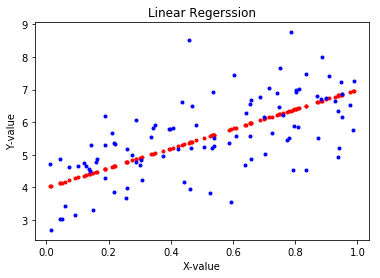

In [10]:
plt.plot(X, y, "r.")
plt.plot(X, y_withNoise, "b.")
plt.xlabel('X-value')
plt.ylabel('Y-value')
plt.title('Linear Regerssion')
plt.show()

In [11]:
# Creat train/test split
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y_withNoise, test_size=0.3, random_state = 42)

In [13]:
print("Number samples in training:", len(X_train))
print("Number samples in testing:", len(X_test))

Number samples in training: 70
Number samples in testing: 30


In [15]:
# 4-5 Train Linear Regeression model
from sklearn import linear_model

In [16]:
Ir_model = linear_model.LinearRegression()
Ir_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
print("Slope/Coefficient: ", Ir_model.coef_)
print("Intercept: ", Ir_model.intercept_)

Slope/Coefficient:  [[2.48270778]]
Intercept:  [4.18658006]


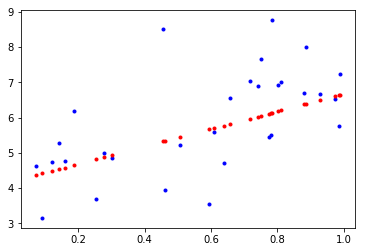

In [19]:
# Visualize predicited verses actual value for the test dataset
y_predicted = Ir_model.intercept_ + Ir_model.coef_ * X_test

plt.plot(X_test, y_test, "b.")
plt.plot(X_test, y_predicted, "r.")

In [20]:
# 7. Evaluate model preformance on the test dataset
from sklearn.metrics import mean_absolute_error

mean_absolute_error(y_test, y_predicted)

0.9016687258320094

In [21]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_predicted)

1.380573159162718

In [22]:
error = y_predicted - y_test
print(error)

[[-0.73568774]
 [-0.1662147 ]
 [ 1.07239328]
 [ 1.25944171]
 [-1.61237045]
 [ 1.38065654]
 [-3.1927864 ]
 [-0.27094961]
 [ 0.65352657]
 [-1.06950136]
 [-1.53149399]
 [-0.74368518]
 [ 0.12440385]
 [ 0.084833  ]
 [ 0.86682612]
 [-1.59696803]
 [-0.18187998]
 [-0.24868509]
 [ 1.13551171]
 [-0.60385624]
 [-2.62074691]
 [-0.87441954]
 [-0.12414733]
 [ 0.09338103]
 [ 0.60866058]
 [ 2.0982637 ]
 [-0.74587367]
 [-0.81054501]
 [ 0.21897855]
 [-0.32337388]]


In [23]:
# Train and vsualize Ridge Regression result
ridge_model = linear_model.Ridge(alpha = 0.1)

In [24]:
ridge_model.fit(X_train, y_train)
ridge_predicted = ridge_model.predict(X_test)

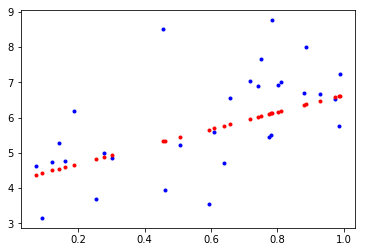

In [27]:
plt.plot(X_test, y_test, "b.")
plt.plot(X_test, ridge_predicted, "r.")

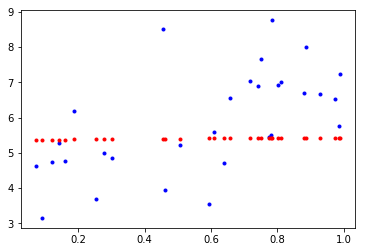

In [26]:
# Train and visualize Lasso Regression results
lasso_model = linear_model.Lasso(alpha=0.2)

lasso_model.fit(X_train, y_train)
lasso_predicted = lasso_model.predict(X_test)

plt.plot(X_test, y_test, "b.")
plt.plot(X_test, lasso_predicted, "r.")

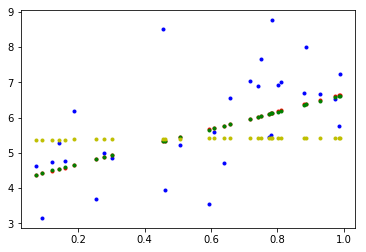

In [28]:
# Visualize results linear, ridge and lasso regersssion result
plt.plot(X_test, y_test, "b.")
plt.plot(X_test, y_predicted, "r.")
plt.plot(X_test, ridge_predicted, "g.")
plt.plot(X_test, lasso_predicted, "y.")

In [30]:
# Train with polynomial features for the model
from sklearn.preprocessing import PolynomialFeatures

In [31]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [32]:
print(X.shape)
print(X_poly.shape)

(100, 1)
(100, 2)


In [33]:
X_polyTrain, X_polyTest, y_ployTrain, y_polyTest = train_test_split(X_poly, y_withNoise, random_state=52)

In [35]:
poly_model = linear_model.LinearRegression()
poly_model.fit(X_polyTrain, y_ployTrain)
y_polyPredicted = poly_model.predict(X_polyTest)

In [36]:
# Load real dataset
from sklearn.datasets import load_boston

In [37]:
boston_data = load_boston()
boston_data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR'])

In [41]:
print(boston_data.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [43]:
X_real = boston_data.data
y_real = boston_data.target

In [53]:
#plot the learning curves
def plot_learning_curves(model, X, y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2)
    train_errors, test_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_test_predict = model.predict(X_test)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        test_errors.append(mean_squared_error(y_test_predict, y_test))
        plt.plot(train_errors, "r-+", linewidth=2, label = "Training Data")
        plt.plot(test_errors, "b-", linewidth=3, label = "Test data")
        plt.ylabel('Mean square error')
        plt.title('linearing Curves')
        plt.legend()

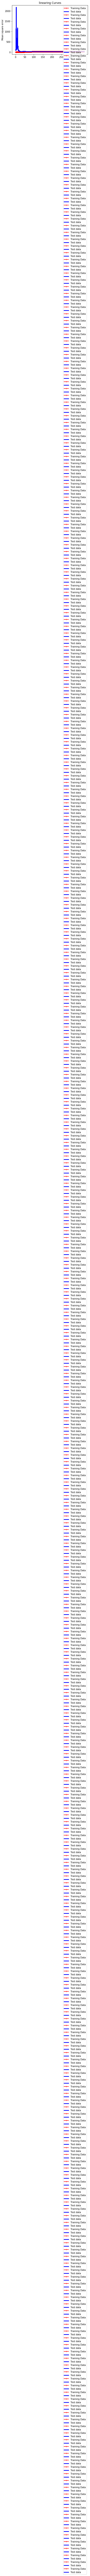

In [54]:
linear_reg_model = linear_model.LinearRegression()
plot_learning_curves(linear_reg_model, X_real, y_real)